<a href="https://colab.research.google.com/github/CamiSilvae/PDI/blob/main/Laboratorio/Pr%C3%A1cticas/Pr%C3%A1ctica6/PDI_P6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Práctica N°06
**Operaciones aritméticas y lógicas**


---

EQUIPO 8

*   2109522 - Camila Andrea Silva Espinoza
*   2049215 - Norma Cecilia Cázares del Ángel
*   2109208 - Alejandro de Jesús Guerrero Maynes
*   2109690 - Mariana Seany Zamarripa Puente


## Parte 1

**Operaciones aritméticas**

---

**1. Carga y preparación de imágenes médicas**


En esta parte del código cargamos dos imágenes médicas en escala de grises usando `cv2.imread()`. Trabajar en escala de grises es útil porque cada píxel tiene solo un valor de intensidad, lo que facilita las operaciones aritméticas que haremos después.

Como ambas imágenes deben tener el mismo tamaño para poder sumarlas, restarlas o multiplicarlas, usamos `cv2.resize()` para ajustar la segunda imagen a las dimensiones de la primera. Esto asegura que cada píxel de una imagen tenga una posición equivalente en la otra.

Finalmente, mostramos las dos imágenes originales con matplotlib para verificar cómo se ven antes de aplicar cualquier operación. Les quitamos los ejes para que la visualización sea más clara. Esta revisión inicial es importante porque nos ayuda a identificar diferencias de brillo, contraste o detalles relevantes entre las imágenes.

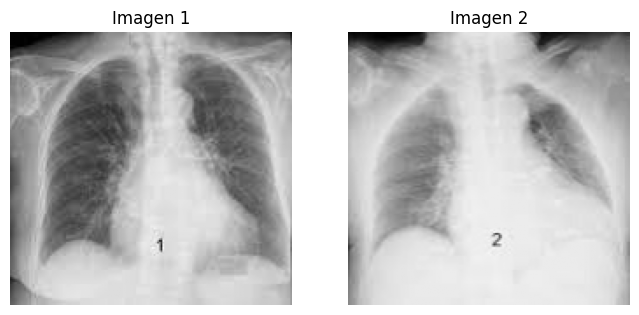

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img1 = cv2.imread('P7.1.jpg', 0)
img2 = cv2.imread('P7.2.jpg', 0)

# Ajuste si no son del mismo tamaño
img2 = cv2.resize(img2, (img1.shape[1], img1.shape[0]))

# Mostrar originales
plt.figure(figsize=(8,4))
plt.subplot(1,2,1); plt.imshow(img1, cmap='gray'); plt.title("Imagen 1"); plt.axis('off')
plt.subplot(1,2,2); plt.imshow(img2, cmap='gray'); plt.title("Imagen 2"); plt.axis('off')
plt.show()


**EJERCICIO 1: Suma de imágenes**

En esta parte del código realizamos diferentes formas de suma entre las dos imágenes médicas. Primero utilizamos la función `cv2.addWeighted()`, que nos permite combinar las imágenes asignando un peso a cada una. En el primer caso usamos pesos 0.7 y 0.3, lo que hace que la imagen 1 tenga mayor influencia en el resultado. En el segundo caso aplicamos pesos 0.5 y 0.5, generando una mezcla equilibrada de ambas imágenes.

También calculamos una tercera imagen usando el promedio simple, dividiendo cada imagen entre dos y sumándolas. Este método combina las imágenes sin darle más importancia a una sobre la otra.

Finalmente mostramos las tres imágenes resultantes para comparar cómo cambian los detalles según el peso asignado. Esto nos ayuda a entender cómo la suma ponderada puede resaltar o reducir características dependiendo de la contribución de cada imagen.

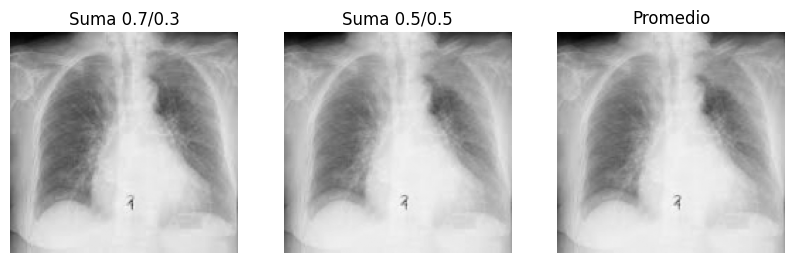

In [ ]:
suma_w1 = cv2.addWeighted(img1, 0.7, img2, 0.3, 0)
suma_w2 = cv2.addWeighted(img1, 0.5, img2, 0.5, 0)
suma_prom = (img1/2 + img2/2).astype('uint8')

plt.figure(figsize=(10,4))
plt.subplot(1,3,1); plt.imshow(suma_w1, cmap='gray'); plt.title("Suma 0.7/0.3"); plt.axis('off')
plt.subplot(1,3,2); plt.imshow(suma_w2, cmap='gray'); plt.title("Suma 0.5/0.5"); plt.axis('off')
plt.subplot(1,3,3); plt.imshow(suma_prom, cmap='gray'); plt.title("Promedio"); plt.axis('off')
plt.show()

**EJERCICIO 2: Resta de imágenes**

En este ejercicio realizamos la resta entre las dos imágenes médicas para observar las diferencias entre ellas. Primero aplicamos una resta normal, donde simplemente se calcula la diferencia píxel a píxel. Sin embargo, este método puede producir valores negativos cuando un píxel de la segunda imagen es mayor que el correspondiente en la primera, lo que puede generar áreas oscuras o distorsiones visuales.

Para evitar este problema usamos la función `cv2.absdiff()`, que calcula la diferencia absoluta entre las imágenes. Esto significa que siempre obtenemos valores positivos, lo que permite visualizar de manera más clara las zonas donde existen variaciones entre ambas imágenes.

Finalmente mostramos los resultados de la resta normal y la resta con absdiff() para comparar cómo cambia la visualización al evitar valores negativos. Esta comparación nos permite identificar mejor las diferencias reales entre las dos imágenes.

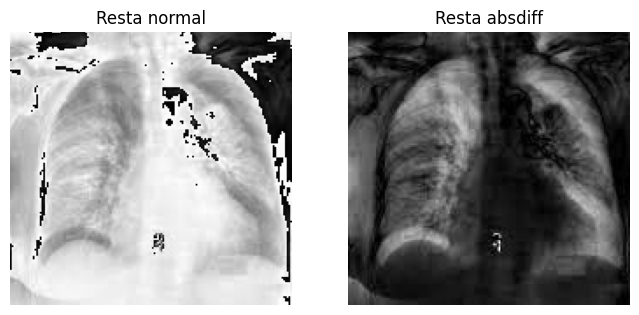

In [ ]:
resta = img1 - img2
resta_abs = cv2.absdiff(img1, img2)

plt.figure(figsize=(8,4))
plt.subplot(1,2,1); plt.imshow(resta, cmap='gray'); plt.title("Resta normal"); plt.axis('off')
plt.subplot(1,2,2); plt.imshow(resta_abs, cmap='gray'); plt.title("Resta absdiff"); plt.axis('off')
plt.show()

**EJERCICIO 3: Múltiplicación por un factor (modificación brillo)**

En este ejercicio aplicamos un factor de multiplicación a la imagen médica con el objetivo de modificar su brillo. Al multiplicar los valores de los píxeles por un número mayor a 1, la imagen se vuelve más brillante. Probamos tres factores distintos: 1.2, 1.5 y 2.0, lo que genera diferentes niveles de aumento en la intensidad de la imagen.

Para evitar que los valores resultantes se salgan del rango permitido (0 a 255), usamos `np.clip()`, que limita los valores máximos y mínimos. Después convertimos el resultado a tipo *uint8*, que es el formato estándar de las imágenes en escala de grises.

Finalmente mostramos las tres imágenes resultantes para observar cómo el brillo se incrementa progresivamente. Esto nos permite analizar cómo cada factor afecta la visibilidad de estructuras médicas y qué tanto se modifica la apariencia general de la imagen.

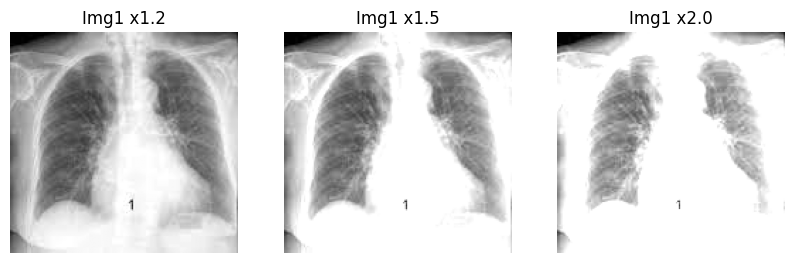

In [ ]:
m1_f1 = np.clip(img1 * 1.2, 0, 255).astype('uint8')
m1_f2 = np.clip(img1 * 1.5, 0, 255).astype('uint8')
m1_f3 = np.clip(img1 * 2.0, 0, 255).astype('uint8')

plt.figure(figsize=(10,3))
plt.subplot(1,3,1); plt.imshow(m1_f1, cmap='gray'); plt.title("Img1 x1.2"); plt.axis('off')
plt.subplot(1,3,2); plt.imshow(m1_f2, cmap='gray'); plt.title("Img1 x1.5"); plt.axis('off')
plt.subplot(1,3,3); plt.imshow(m1_f3, cmap='gray'); plt.title("Img1 x2.0"); plt.axis('off')
plt.show()

**EJERCICIO 4: Multiplicación elemento por elemento**

En este ejercicio realizamos la multiplicación de las dos imágenes médicas píxel por píxel. Para hacerlo correctamente, primero normalizamos ambas imágenes dividiendo entre 255, de modo que sus valores estén entre 0 y 1. Después multiplicamos cada par de píxeles correspondientes y finalmente volvemos a escalar el resultado al rango de 0 a 255.

El resultado de esta operación es una imagen donde solo se conservan las zonas donde ambas imágenes tienen valores altos al mismo tiempo. Por eso, esta técnica puede ser útil en aplicaciones biomédicas donde se desea resaltar áreas comunes entre dos imágenes, como en enmascaramiento, detección de regiones de interés o combinación de modalidades médicas.

Al mostrar la imagen final, podemos observar cómo la multiplicación reduce intensidades y resalta únicamente las coincidencias entre ambas imágenes.

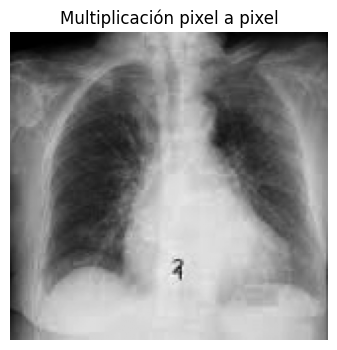

In [ ]:
mult_pix = ((img1/255) * (img2/255) * 255).astype('uint8')

plt.figure(figsize=(5,4))
plt.imshow(mult_pix, cmap='gray')
plt.title("Multiplicación pixel a pixel")
plt.axis('off')
plt.show()

## Parte 2

**Operaciones lógicas**

---

**EJERCICIO 1: Ecualización**

En este ejercicio trabajamos con una imagen médica de bajo contraste para mejorar su visibilidad mediante ecualización de histograma. Primero cargamos la imagen en escala de grises y calculamos su histograma original usando `cv2.calcHist()`. Este histograma nos permite observar cómo están distribuidos los valores de intensidad y verificar si la imagen está concentrada en un rango pequeño (lo que explica el bajo contraste).

Luego aplicamos `cv2.equalizeHist()`, una función que redistribuye las intensidades para que el contraste mejore. Lo que hace esta técnica es extender los valores de intensidad a todo el rango disponible (0–255), haciendo más visibles estructuras que antes estaban muy oscuras o muy claras.

Después calculamos el histograma de la imagen ecualizada para compararlo con el original. Al observar ambos histogramas, se puede ver cómo la ecualización reparte mejor los niveles de intensidad.

Finalmente mostramos la imagen original, la imagen ecualizada y los dos histogramas. Esta comparación nos permite apreciar claramente cómo mejora el contraste y cómo se distribuyen mejor los valores de intensidad en la imagen procesada.

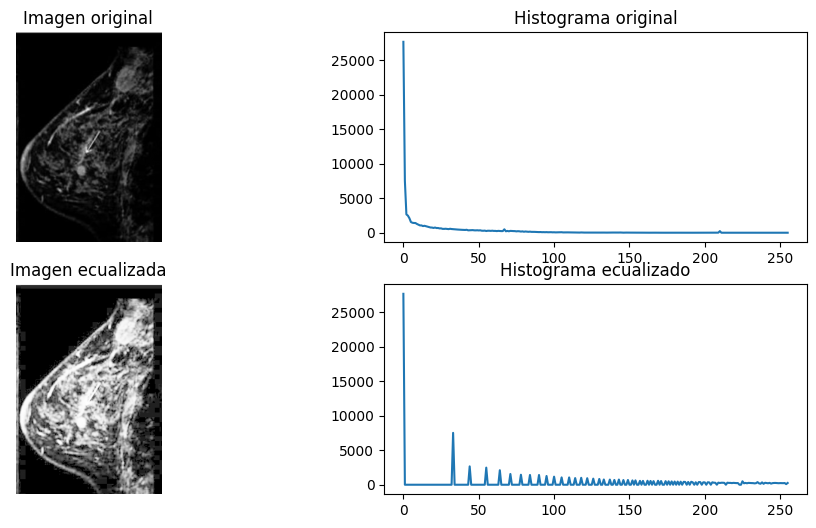

In [ ]:
import cv2
import matplotlib.pyplot as plt

img_low = cv2.imread('P7.3.jpg', 0)

hist_orig = cv2.calcHist([img_low], [0], None, [256], [0,256])

img_eq = cv2.equalizeHist(img_low)

hist_eq = cv2.calcHist([img_eq], [0], None, [256], [0,256])

plt.figure(figsize=(12,6))

plt.subplot(2,2,1)
plt.imshow(img_low, cmap='gray')
plt.title("Imagen original")
plt.axis('off')

plt.subplot(2,2,2)
plt.plot(hist_orig)
plt.title("Histograma original")

plt.subplot(2,2,3)
plt.imshow(img_eq, cmap='gray')
plt.title("Imagen ecualizada")
plt.axis('off')

plt.subplot(2,2,4)
plt.plot(hist_eq)
plt.title("Histograma ecualizado")

plt.show()
